In [2]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('project1.data')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [6]:
data.shape

(398, 9)

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
# data['horsepower'].astype(float)
horsepower_avg = data[data['horsepower'] != '?']['horsepower'].astype(float).median()
horsepower_avg
data.loc[data['horsepower'] == '?',['horsepower']] = horsepower_avg

data['horsepower'] = data['horsepower'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f07add0bf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07afb3d410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07add0b350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07add16650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07add16f90>],
 'means': []}

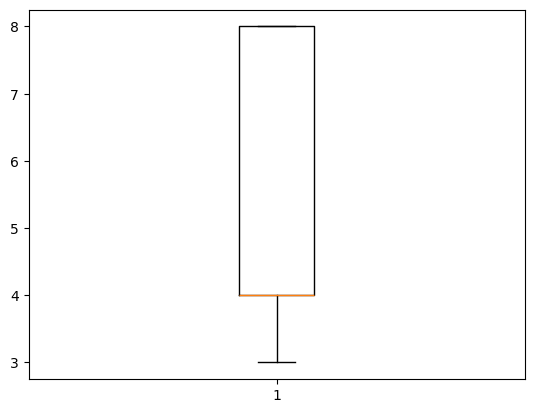

In [10]:
plt.boxplot(data['cylinders'])

In [11]:
keys = data.keys()
keys = keys.to_list()
keys.remove('car_name')
keys.remove('weight')
print(keys)

['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']


In [12]:
for key in keys:
    print(key)
    for subkey in keys:
        if subkey is not key:
            plt.scatter(data[key], data[subkey], label=subkey)
    plt.xlabel(key)
    plt.legend()
    plt.savefig('figures/'+key+'_indep.png', bbox_inches='tight')
    plt.close()

# use corr matrix?

mpg
cylinders
displacement
horsepower
acceleration
model_year
origin


In [24]:
corr = data.drop(['car_name'], axis=1).corr()
corr2 = corr[(abs(corr)>0.75)&(abs(corr)<1)].dropna(how='all', axis=1).dropna(how='all')

In [26]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


In [28]:
corr2

,mpg,cylinders,displacement,horsepower,weight
mpg,NaN,-0.775396,-0.804203,-0.773453,-0.831741
cylinders,-0.775396,NaN,0.950721,0.841284,0.896017
displacement,-0.804203,0.950721,NaN,0.895778,0.932824
horsepower,-0.773453,0.841284,0.895778,NaN,0.862442
weight,-0.831741,0.896017,0.932824,0.862442,NaN
